In [42]:
from FuselageDesign.ShapeFunction import *
from FuselageDesign.ToolKits import *
import FuselageDesign as fd 
#from numpy import logspace,pi,cos 
import numpy as np
import matplotlib.pyplot as plt 

In [45]:
x = np.logspace(1,12,12,base=1.2)*0.001
nx = np.append(x,np.ones(47)*0.02)
nx = np.append(0.,nx)
nx = nx.cumsum()
nx = np.append(nx,1.)
nx *= 0.9
nx

array([0.        , 0.00108   , 0.002376  , 0.0039312 , 0.00579744,
       0.00803693, 0.01072431, 0.01394918, 0.01781901, 0.02246281,
       0.02803538, 0.03472245, 0.04274694, 0.06074694, 0.07874694,
       0.09674694, 0.11474694, 0.13274694, 0.15074694, 0.16874694,
       0.18674694, 0.20474694, 0.22274694, 0.24074694, 0.25874694,
       0.27674694, 0.29474694, 0.31274694, 0.33074694, 0.34874694,
       0.36674694, 0.38474694, 0.40274694, 0.42074694, 0.43874694,
       0.45674694, 0.47474694, 0.49274694, 0.51074694, 0.52874694,
       0.54674694, 0.56474694, 0.58274694, 0.60074694, 0.61874694,
       0.63674694, 0.65474694, 0.67274694, 0.69074694, 0.70874694,
       0.72674694, 0.74474694, 0.76274694, 0.78074694, 0.79874694,
       0.81674694, 0.83474694, 0.85274694, 0.87074694, 0.88874694,
       0.9       ])

### 根据NACA翼型厚度获得宽度曲线

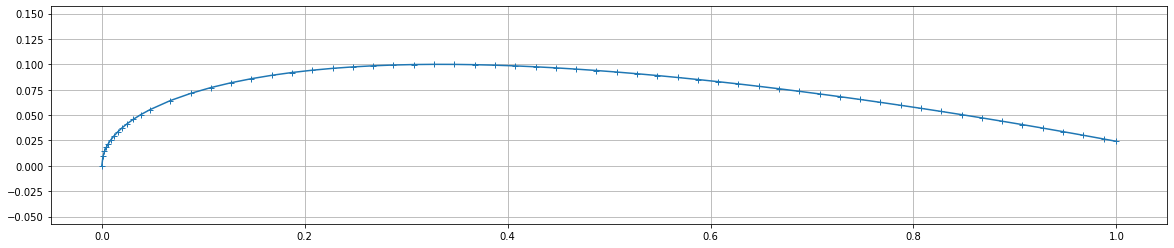

In [22]:
plt.figure(figsize=[20,4])
x,y=naca4(nx,20)
plt.plot(x/0.9,y,"+-")
plt.grid()
plt.axis("equal")
bb=y

### 根据翼型获得高度曲线

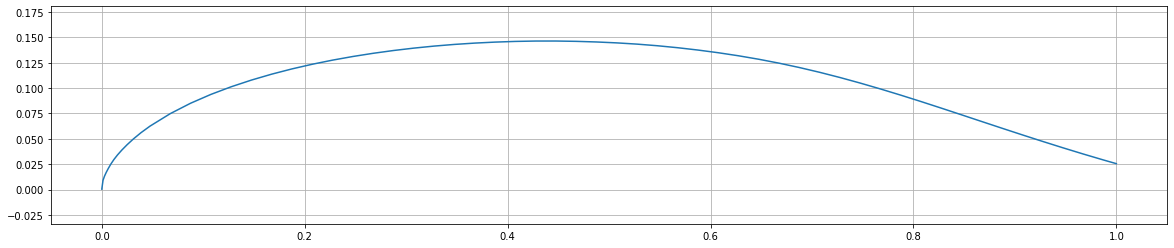

In [23]:
plt.figure(figsize=[20,4])
x,y=getthickness(nx,fn=".\\FuselageDesign\e585.dat")
plt.plot(x/0.9,y)
plt.axis("equal")
plt.grid()
aa=y


In [24]:
### 根据B样条曲线确定nn参数  单组参数

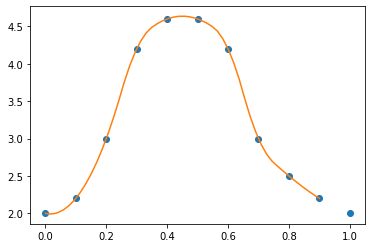

In [25]:
x=np.linspace(0,1,11)
y=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])

from scipy.interpolate import splev, splrep
s=splrep(x,y,k=2)
ny=splev(nx,s)
plt.plot(x,y,"o",nx,ny)
nn=ny

In [26]:
## 根据B样条曲线确定nn参数  两组参数

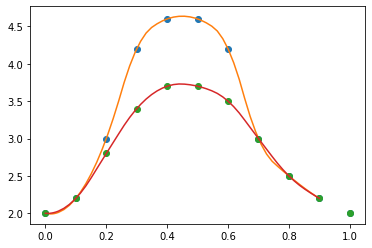

In [27]:
x=np.linspace(0,1,11)
y1=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])
y2=np.array([2,2.2,2.8,3.4,3.7,3.7,3.5,3,2.5,2.2,2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
plt.plot(x,y1,"o",nx,ny1)
s2=splrep(x,y2,k=2)
ny2=splev(nx,s2)
plt.plot(x,y2,"o",nx,ny2)
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

(-0.006001139569722799,
 0.1260239309641788,
 -0.16082160724575892,
 0.16101781374172175)

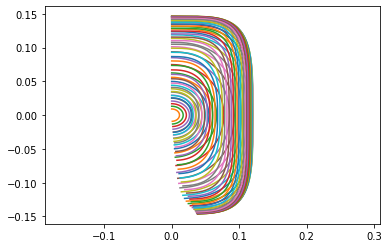

In [28]:
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    x,y=HyperEllipse(aa[idx],bb[idx]*1.2,nn[idx],psi,half=True)
    plt.plot(x[:40],y[:40])
plt.axis("equal")

(-0.13202507053390158,
 0.13202507053390158,
 -0.1610276240665199,
 0.1610276240665199)

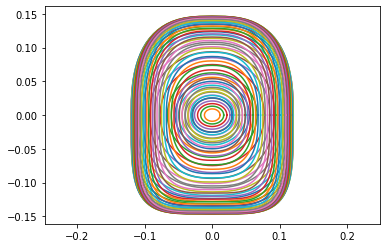

In [29]:
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])
    x,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    plt.plot(y,x)
plt.axis("equal")

(-0.13202507053390158,
 0.13202507053390158,
 -0.1610276240665199,
 0.1610276240665199)

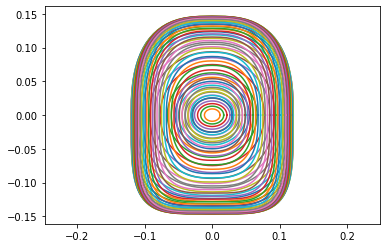

In [30]:
of = open("E:\TestFuselageData.txt",'w')
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])
    x,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    plt.plot(y,x)
    for jdx, j in enumerate(y):
        of.write("%f %f %f\n"%(i*1.5,y[jdx],x[jdx]-idx*0.01))
    of.write("\n")
of.close()
plt.axis("equal")

0.14638874915138173

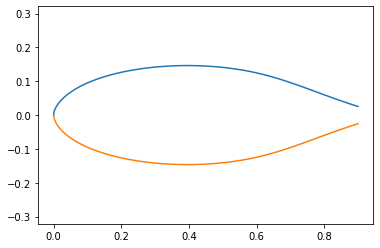

In [35]:
psi = np.linspace(0,2*pi,81)
ymax=[]
ymin=[]
for idx, i in enumerate(nx):
    #print(nn4[idx])
    y,z=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    ymax.append(y.max())
    ymin.append(y.min())
plt.plot(nx,ymax)
plt.plot(nx,ymin)
plt.axis("equal")
max(ymax)

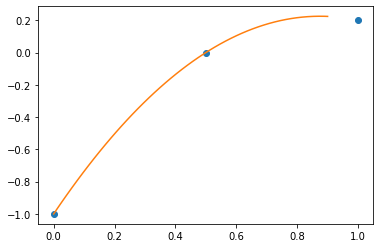

In [25]:
x=np.array([0,0.5,1])
y1=np.array([-1,0,0.2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)   # ny1就是插值得到的y值，也就是要求的delta
plt.plot(x,y1,"o",nx,ny1)
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T